In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def readDt2(path):
    candles_df = pd.read_csv(path)
    candles_df.drop(['Unnamed: 0'], axis=1, inplace=True)
    return candles_df

In [3]:
path = '../Data/LSTM_candle_tanh.csv'
candle_all = readDt2(path)

candOpen  = candle_all['Open']
candHigh  = candle_all['High']
candLow   = candle_all['Low']
candClose = candle_all['Close']

In [4]:
path = '../Data/multi_LSTM_tanh.csv'
candle_multi_lstm = readDt2(path)

indvOpen   = candle_multi_lstm['Open']
indvHigh   = candle_multi_lstm['High']
indvLow    = candle_multi_lstm['Low']
indvClose  = candle_multi_lstm['Close']

In [5]:
path = '../Data/Ground_truth.csv'
ground_truth = readDt2(path)

actualOpen   = ground_truth['Open']
actualHigh   = ground_truth['High']
actualLow    = ground_truth['Low']
actualClose  = ground_truth['Close']

In [6]:
path = '../Data/FLF_tanh.csv'
FLF_candle = readDt2(path)

FLFOpen = FLF_candle['Open']
FLFHigh = FLF_candle['High']
FLFLow = FLF_candle['Low']
FLFClose = FLF_candle['Close']

In [7]:
actualHeight = np.subtract(actualHigh, actualLow)
FLFHeight    = np.subtract(FLFHigh, FLFLow)
indvHeight   = np.subtract(indvHigh, indvLow)
candHeight   = np.subtract(candHigh, candLow)

FLFDif = np.subtract(actualOpen,FLFOpen)
indvDif = np.subtract(actualOpen,indvOpen)
candDif = np.subtract(actualOpen,candOpen)


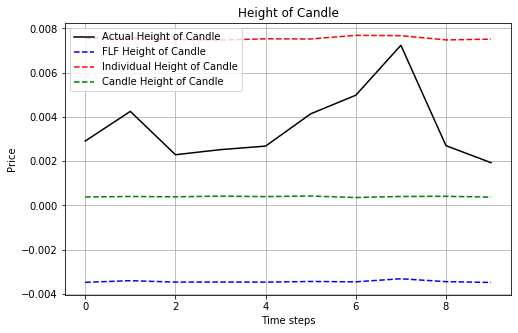

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(10), actualHeight[:10],  'k-',  label = 'Actual Height of Candle');
plt.plot(range(10), FLFHeight[:10],     'b--', label = 'FLF Height of Candle')
plt.plot(range(10), indvHeight[:10],    'r--', label = 'Individual Height of Candle')
plt.plot(range(10), candHeight[:10],    'g--', label = 'Candle Height of Candle')

plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('Height of Candle')
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

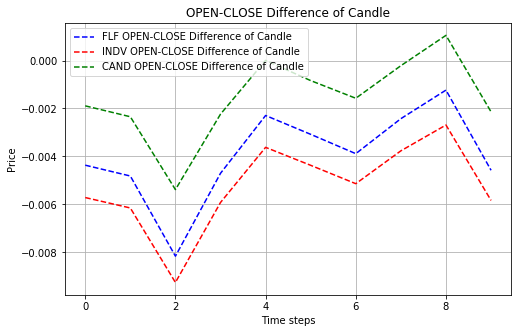

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(10), FLFDif[100:110],'b--', label = 'FLF OPEN-CLOSE Difference of Candle');
plt.plot(range(10),indvDif[100:110],'r--', label = 'INDV OPEN-CLOSE Difference of Candle')
plt.plot(range(10),candDif[100:110],'g--', label = 'CAND OPEN-CLOSE Difference of Candle')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('OPEN-CLOSE Difference of Candle')
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

In [10]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

In [16]:
amount = 400

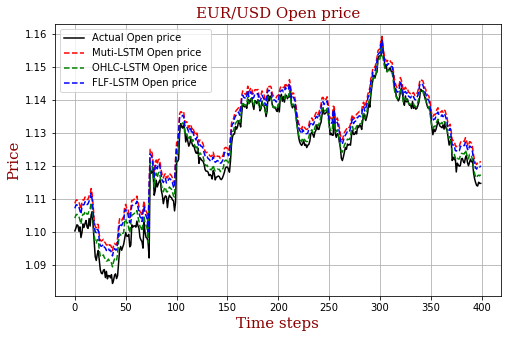

In [21]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8, 5))
plt.plot(range(amount), actualOpen[0:amount],'k-', label = 'Actual Open price')
plt.plot(range(amount),indvOpen[0:amount],'r--', label = 'Muti-LSTM Open price')
plt.plot(range(amount),candOpen[0:amount],'g--', label = 'OHLC-LSTM Open price')
plt.plot(range(amount),FLFOpen[0:amount],'b--', label = 'FLF-LSTM Open price')
plt.xlabel('Time steps',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('EUR/USD Open price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.savefig('../plots/open_price.png')
plt.show()

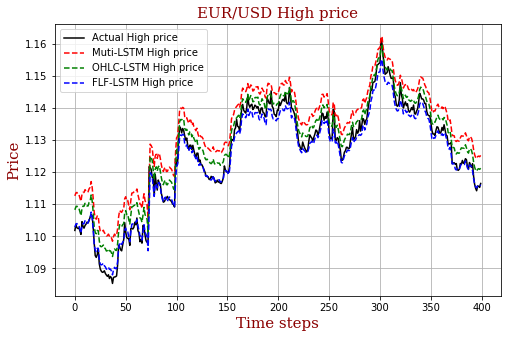

In [22]:
plt.figure(figsize=(8, 5))
#plt.plot(range(50), prediHigh[1100:100],'k-', label = 'Predicted High price');
plt.plot(range(amount), actualHigh[0:amount],'k-', label = 'Actual High price');
plt.plot(range(amount),indvHigh[0:amount],'r--', label = 'Muti-LSTM High price')
plt.plot(range(amount),candHigh[0:amount],'g--', label = 'OHLC-LSTM High price')
plt.plot(range(amount),FLFHigh[0:amount],'b--', label = 'FLF-LSTM High price')
plt.xlabel('Time steps',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('EUR/USD High price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.savefig('../plots/High_price.png')
plt.show()

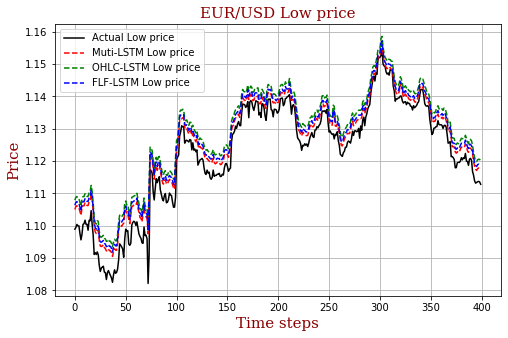

In [23]:
plt.figure(figsize=(8, 5))
#plt.plot(range(prediLow.shape[0]), prediLow,'k-', label = 'Predicted Low price');
plt.plot(range(amount), actualLow[0:amount],'k-', label = 'Actual Low price');
plt.plot(range(amount),indvLow[0:amount],'r--', label = 'Muti-LSTM Low price')
plt.plot(range(amount),candLow[0:amount],'g--', label = 'OHLC-LSTM Low price')
plt.plot(range(amount),FLFLow[0:amount],'b--', label = 'FLF-LSTM Low price')
plt.xlabel('Time steps',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('EUR/USD Low price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.savefig('../plots/low_price.png')
plt.show()

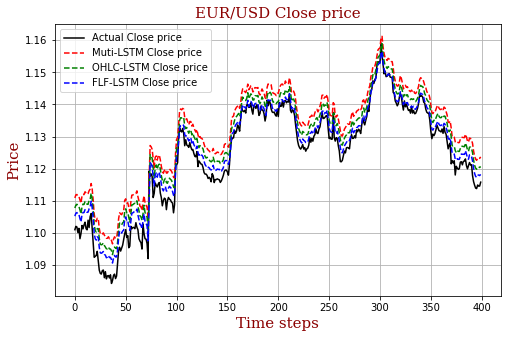

In [24]:
plt.figure(figsize=(8, 5))
#plt.plot(range(prediLow.shape[0]), prediClose,'k-', label = 'Predicted Close price');
plt.plot(range(amount), actualClose[0:amount],'k-', label = 'Actual Close price');
plt.plot(range(amount),indvClose[0:amount],'r--', label = 'Muti-LSTM Close price')
plt.plot(range(amount),candClose[0:amount],'g--', label = 'OHLC-LSTM Close price')
plt.plot(range(amount),FLFClose[0:amount],'b--', label = 'FLF-LSTM Close price')
plt.xlabel('Time steps',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('EUR/USD Close price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.savefig('../plots/close_price.png')
plt.show()